#Part B Group 1 Image Classification



In [ ]:
# Conection to google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Modules

In [ ]:
import keras
import numpy as np

#Load Model and print model summary

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Runmila/Group_one_model")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

#Evaluate Model

View Score and accuracy

In [ ]:
x_val=np.load("/content/drive/MyDrive/Runmila/x_val.npy")
y_val=np.load("/content/drive/MyDrive/Runmila/y_val.npy")

score = model.evaluate(x_val, y_val, verbose=0)

print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.14121486246585846
Test accuracy:  0.9577706456184387


**To Visualize Filters**

 


conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
(3, 3, 32, 32)


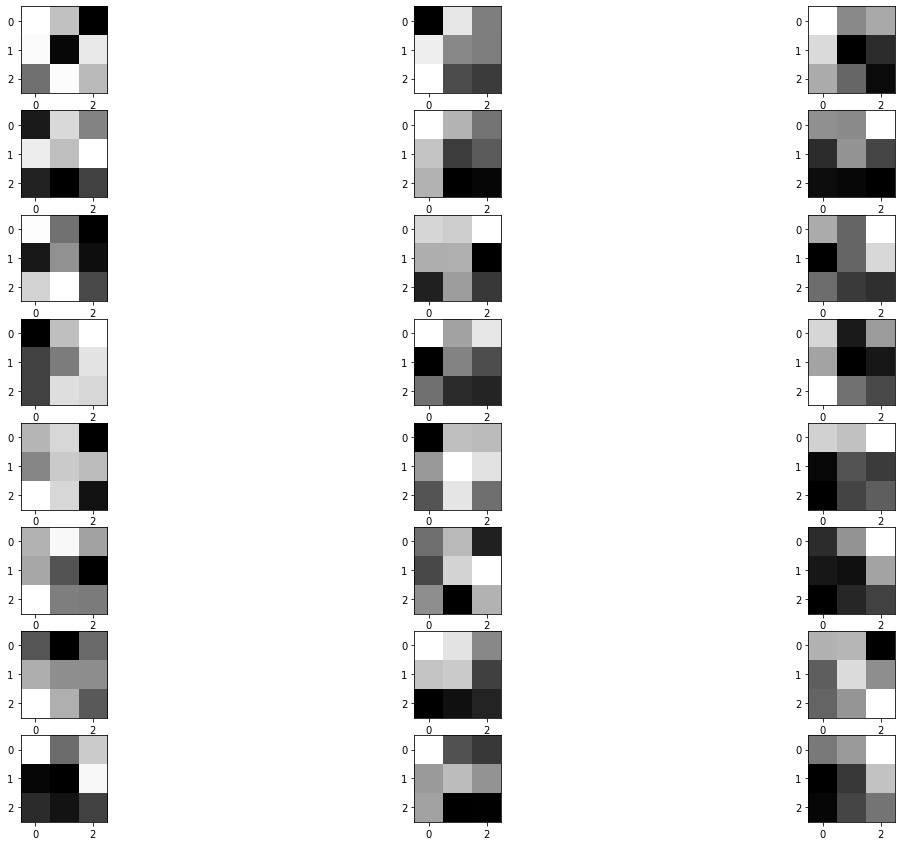

In [ ]:
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import numpy as np


#  to give any idea of the shape of the filters (weights) in the network
#  we check the name of each layer and skip any that don’t contain the string ‘conv



for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 

#  We then retrieve the filters from the first layer (third hidden layer) as follows:

filters = model.layers[2].get_weights()
print(filters[0].shape)


# Next we enumerate the first 8 filters out of the 32 in the block and plot each of the three channels of each filter.


n_filters =8
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    f = filters[0][:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1



plt.show()

**Visualize feature maps**

In [ ]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	if 'conv' not in layer.name:
		continue

	print(i, layer.name, layer.output.shape)

0 conv2d (None, 100, 100, 32)
2 conv2d_1 (None, 50, 50, 32)


In [ ]:
# Taking a subset of the full model that would be the output of a given convolutional layer, to see the feature map.

model = Model(inputs=model.inputs , outputs=model.layers[2].output)

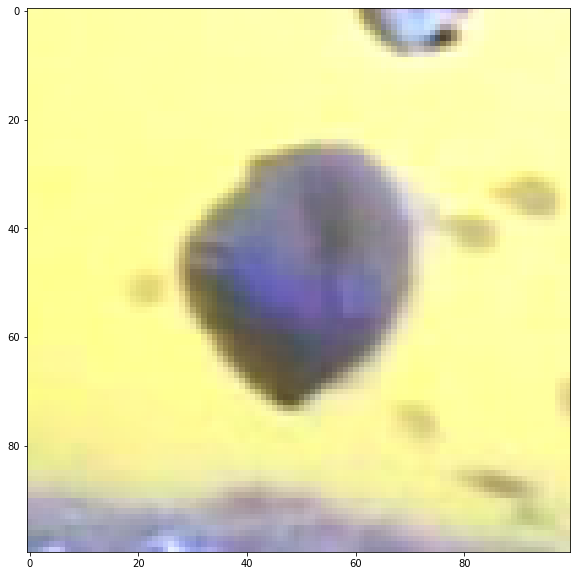

In [ ]:
# Taking a random image from class 22 and setting it to required standards to show feature map

import cv2
import matplotlib.pyplot as plt


image = cv2.imread("/content/drive/MyDrive/Runmila/fish_image/fish_22/fish_000021760001_01811.png")
image=cv2.resize(image, (100, 100))

plt.imshow(image)

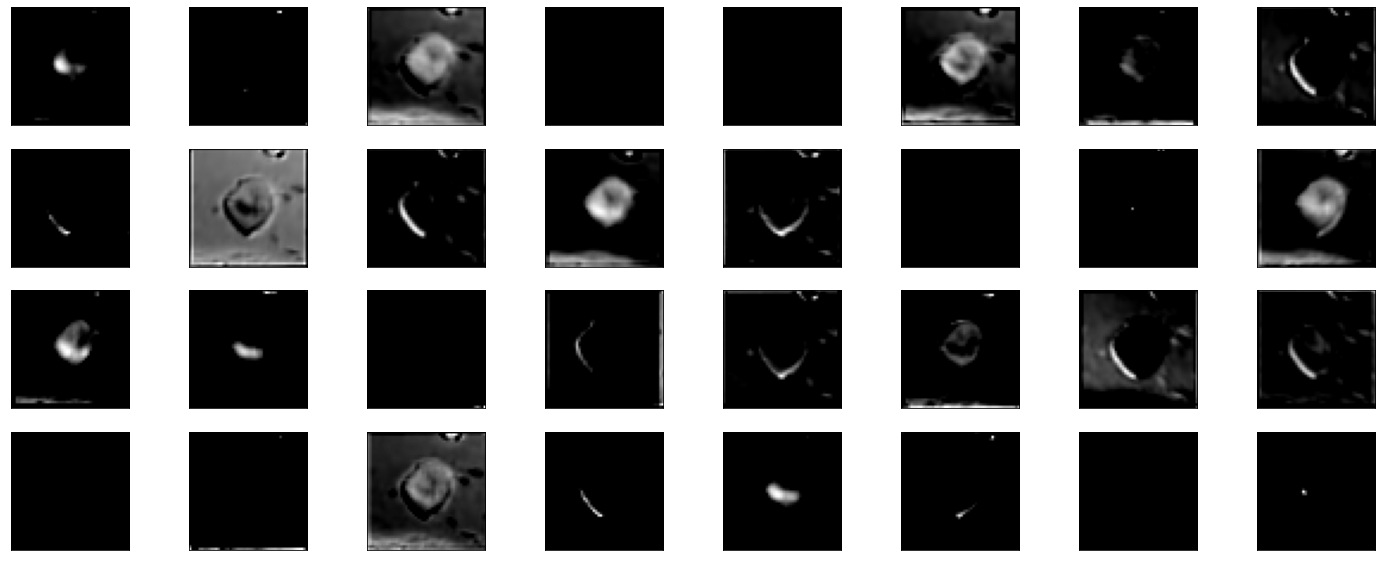

In [ ]:


# To make it a single sample
img = expand_dims(image, axis=0)


feature_maps = model.predict(img)

# plot all 32 maps in an 4x8 squares

plt.rcParams["figure.figsize"] = (25,10)
ix = 1
for _ in range(4):
	for _ in range(8):
		ax = plt.subplot(4, 8, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1


plt.show()